In [70]:
import pandas as pd
import numpy as np

import regex as re

import matplotlib.pyplot as plt

import scipy

In [98]:
db = pd.read_csv("ytdaily/BR_youtube_trending_data.csv")

In [108]:
db

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,s9FH4rDMvds,LEVEI UM FORA? FINGI ESTAR APAIXONADO POR ELA!,2020-08-11T22:21:49Z,UCGfBwrCoi9ZJjKiUK8MmJNw,Pietro Guedes,22,2020-08-12T00:00:00Z,pietro|guedes|ingrid|ohara|pingrid|vlog|amigos...,263835,85095,487,4500,https://i.ytimg.com/vi/s9FH4rDMvds/default.jpg,False,False,"Salve rapaziada, neste vídeo me declarei pra e..."
1,jbGRowa5tIk,ITZY “Not Shy” M/V TEASER,2020-08-11T15:00:13Z,UCaO6TYtlC8U5ttz62hTrZgg,JYP Entertainment,10,2020-08-12T00:00:00Z,JYP Entertainment|JYP|ITZY|있지|ITZY Video|ITZY ...,6000070,714310,15176,31040,https://i.ytimg.com/vi/jbGRowa5tIk/default.jpg,False,False,ITZY Not Shy M/V[ITZY Official] https://www.yo...
2,3EfkCrXKZNs,Oh Juliana PARÓDIA - MC Niack,2020-08-10T14:59:00Z,UCoXZmVma073v5G1cW82UKkA,As Irmãs Mota,22,2020-08-12T00:00:00Z,OH JULIANA PARÓDIA|MC Niack PARÓDIA|PARÓDIAS|A...,2296748,39761,5484,0,https://i.ytimg.com/vi/3EfkCrXKZNs/default.jpg,True,False,Se inscrevam meus amores! 📬 Quer nos mandar al...
3,gBjox7vn3-g,Contos de Runeterra: Targon | A Estrada Tortuosa,2020-08-11T15:00:09Z,UC6Xqz2pm50gDCORYztqhDpg,League of Legends BR,20,2020-08-12T00:00:00Z,Riot|Riot Games|League of Legends|lol|trailer|...,300510,46222,242,2748,https://i.ytimg.com/vi/gBjox7vn3-g/default.jpg,False,False,Você se unirá aos Lunari e aos Solari em Targo...
4,npoUGx7UW7o,Entrevista com Thammy Miranda | The Noite (10/...,2020-08-11T20:04:02Z,UCEWOoncsrmirqnFqxer9lmA,The Noite com Danilo Gentili,23,2020-08-12T00:00:00Z,The Noite|The Noite com Danilo Gentili|Danilo ...,327235,22059,3972,2751,https://i.ytimg.com/vi/npoUGx7UW7o/default.jpg,False,False,Danilo Gentili recebe Thammy Miranda. Após pas...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38788,Uy4_C6Ev8S8,"Sam Fischer, Demi Lovato - What Other People S...",2021-02-16T16:00:19Z,UCkW1W1_0rANDKlAa3HYwmXA,SamFischerVEVO,10,2021-02-25T00:00:00Z,sam fischer|demi lovato|demi|what other people...,3133410,167396,1557,8033,https://i.ytimg.com/vi/Uy4_C6Ev8S8/default.jpg,False,False,Sam Fischer & Demi Lovato – What Other People ...
38789,JM-NqFX2jU8,DOTA: Dragon's Blood | Date Announcement | Net...,2021-02-17T00:00:00Z,UCWOA1ZGywLbqmigxE4Qlvuw,Netflix,24,2021-02-25T00:00:00Z,Dota Dragon's Blood|Ashley Miller|Valve Studio...,2679121,75437,4159,10175,https://i.ytimg.com/vi/JM-NqFX2jU8/default.jpg,False,False,"The story you've been waiting for, is finally ..."
38790,jR681pwWPm0,"Deve ter sentido que no São Paulo É DIFERENTE,...",2021-02-16T23:26:19Z,UCcndglQZmXnYjgE_Grqt5yg,Gazeta Esportiva,17,2021-02-25T00:00:00Z,gazeta esportiva|GAZETA ESPORTIVA DE HOJE|notí...,151552,4428,101,304,https://i.ytimg.com/vi/jR681pwWPm0/default.jpg,False,False,O recém chegado novo técnico do Tricolor teve ...
38791,Zk5qMdv_BCc,TROLLEI O VICTOR FALANDO QUE ESTOU GOSTANDO DELE,2021-02-15T18:27:12Z,UCpO4C7n86oFyCtlpiVPtcDA,By Pamella,24,2021-02-25T00:00:00Z,pamella libbre|bypamella|entretenimento|videos...,2444745,420309,2722,12439,https://i.ytimg.com/vi/Zk5qMdv_BCc/default.jpg,False,False,"Iae galera, bem vindos a mais um vídeo do cana..."


 # Primeira Pergunta
 
 Existe uma correlação entre o horário em que os vídeos que entraram nas trends do youtube e o sucesso do vídeo na plataforma?

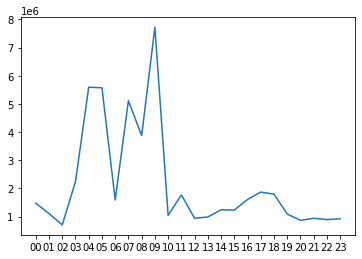

In [93]:
hour_mean = db.groupby(db.publishedAt.str[11:13])["view_count"].mean()
sz = db.groupby(db.publishedAt.str[11:13]).size()

plt.plot(hour_mean)

532


# Segunda pergunta

    Qual a correlação entre as tags utilizadas num vídeo e sucesso dele dentro dos trends da plataforma
    
    Possível ampliação da pergunta:
        Corrigir sobre Tags que apontam pro próprio canal.
        

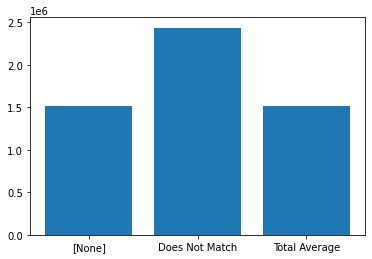

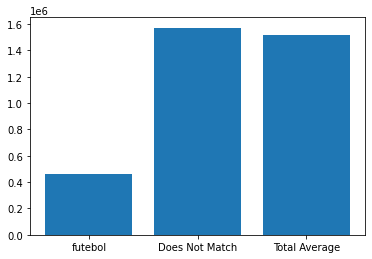

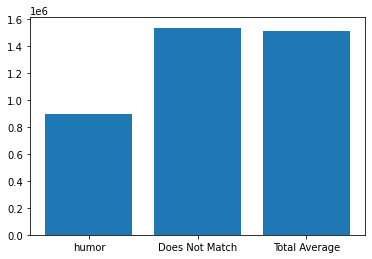

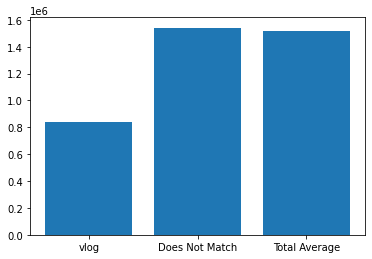

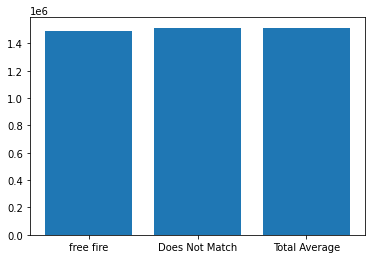

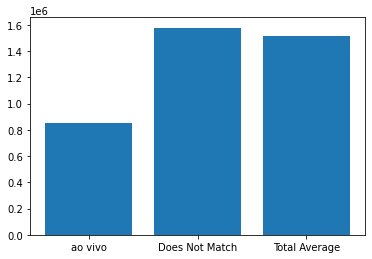

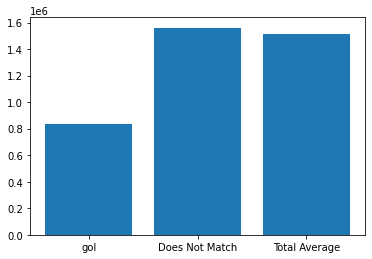

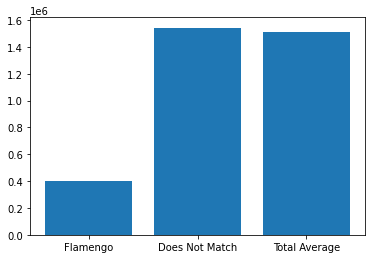

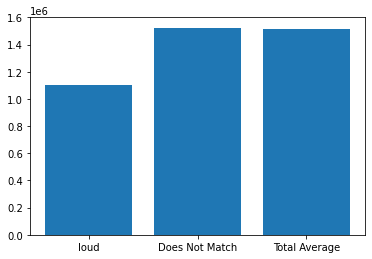

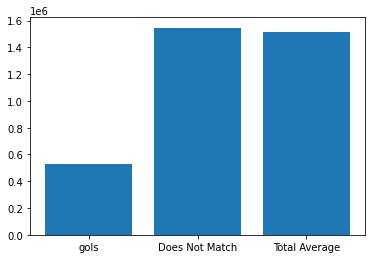

In [118]:
from operator import itemgetter 

def getAllTags (db: pd.DataFrame) -> dict:
    alltags = dict()
    for tags in db.tags:
        
        tags = tags.split("|")
        for tag in tags:
            if tag in alltags:
                alltags[tag] += 1
            else:
                alltags[tag] = 1
    return alltags

alltags = getAllTags(db)

alltags_sorted = sorted(alltags.items(), key=itemgetter(1), reverse=True)[ : 600 ]
alltags_wmean = dict()

for tag, size in alltags_sorted[ : 10]:
    
    means = db.groupby(db.tags.str.contains(tag))["view_count"].mean()
    total_average = db["view_count"].mean()
    
    tags = [ tag, "Does Not Match", "Total Average" ]
    means = [ means[1], means[0], total_average]
    
    plt.bar(x = tags, height=means)
    plt.show()

# Terceira Pergunta

A quantidade de tags de um vídeo influenciam seu sucesso nos trendings do youtube?

In [1]:
tag_mean = db.groupby(db.tags.str.split("|").str.len())["view_count"].mean()
sz = db.groupby(db.tags.str.split("|").str.len()).size()

plt.plot(tag_mean)

NameError: name 'db' is not defined

In [115]:
dj = pd.read_json("ytdaily/BR_category_id.json")
dj.iloc[0]["items"]

{'kind': 'youtube#videoCategory',
 'etag': 'IfWa37JGcqZs-jZeAyFGkbeh6bc',
 'id': '1',
 'snippet': {'title': 'Film & Animation',
  'assignable': True,
  'channelId': 'UCBR8-60-B28hp2BmDPdntcQ'}}